# FDA HW1

# Part 1: Meal Reviews

<img src="https://i.imgur.com/9ubvK3v.jpg" width="900" />

Dataset: [Reviews.csv](https://drive.google.com/file/d/1JUM5y1o4hYdZIioy2gN-I22a8673S6Pt/view?usp=sharing)

In [1]:
import numpy as np # linear algebra
import scipy as sp 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

In [2]:
data_path = "./data/Reviews.csv"

# Read csv file to pandas dataframe
pd_data = pd.read_csv(data_path)
print(pd_data.shape)
pd_data.head()

(568454, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
pd_data = pd_data[:10000]
copied_data = pd_data.copy()

## 1. Top-10 Reviewers

In [4]:
def top_n_counts(attrs, attr, n):
#   groupby_obj = pd_data.groupby(attrs)[attr].count().sort_values(ascending=False)
  groupby_obj = pd_data.groupby(attrs)[attr].agg(['count', 'mean']).sort_values(by='count', ascending=False)
  return groupby_obj.head(n)
     
top_10_reviewers = top_n_counts(['UserId', 'ProfileName'], 'Score', 10)
top_10_reviewers = top_10_reviewers.reset_index().rename(columns={'count':'Score count', 'mean':'Score mean'})
top_10_reviewers
# print(type(top_10_reviewers))

# score_mean = []
# for index, val in top_10_reviewers.iteritems():
#   print (index, val)
#   uid = index[0]
#   score_mean.append(pd_data[pd_data['UserId'] == uid]['Score'].mean())
# top_10_reviewers = top_10_reviewers.reset_index(col_fill='Score count')
# top_10_reviewers['Score mean'] = score_mean
# top_10_reviewers

,UserId,ProfileName,Score count,Score mean
0,A1Z54EM24Y40LL,c2,17,3.882353
1,A2SZLNSI5KOQJT,"Carrie, ""Formerly &#34;Sister Carrie&#34;""",10,3.800000
2,A35R32TA60XD57,M. Torma,9,4.111111
3,A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review""",8,5.000000
4,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",7,4.428571
5,A3NHUQ33CFH3VM,Citizen John,7,3.142857
6,A3PJZ8TU8FDQ1K,Jared Castle,7,4.714286
7,AQ6SHOW0VMZGF,"K. Padgett ""familyof5""",6,2.666667
8,A26NFIQ7KWI8Y7,kt rose,6,2.666667
9,A10H24TDLK2VDP,William Jens Jensen,6,3.000000


## 2. Plot score distribution for the user with the most number of reviews

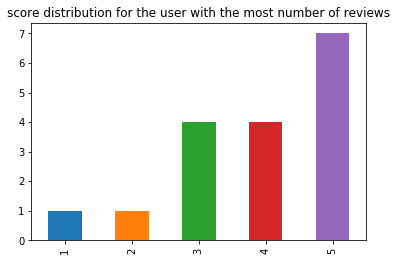

In [5]:
# score distribution for the user with the most number of reviews
uid_most_reviews = top_10_reviewers['UserId'][0]
score_count = pd_data[pd_data['UserId'] == uid_most_reviews]['Score'].value_counts(ascending=True)
score_count.plot(kind="bar", title='score distribution for the user with the most number of reviews')

## 3. Plot pandas Series DataFrame (Time->Date)

<class 'pandas.core.series.Series'>


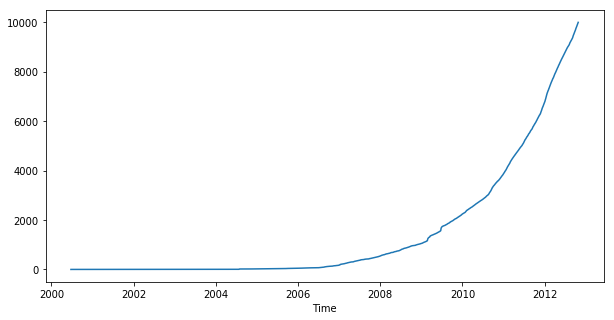

In [6]:
time_series = pd.DataFrame()
time_series['Time'] = pd.to_datetime(pd_data['Time'], unit='s').copy()
series_df = pd_data.groupby([time_series.Time.dt.date]).count()['UserId'].cumsum().fillna(0)
print(type(series_df))
series_df.plot(figsize=(10,5), grid=False)

## 4. Plot HeatMap using seaborn

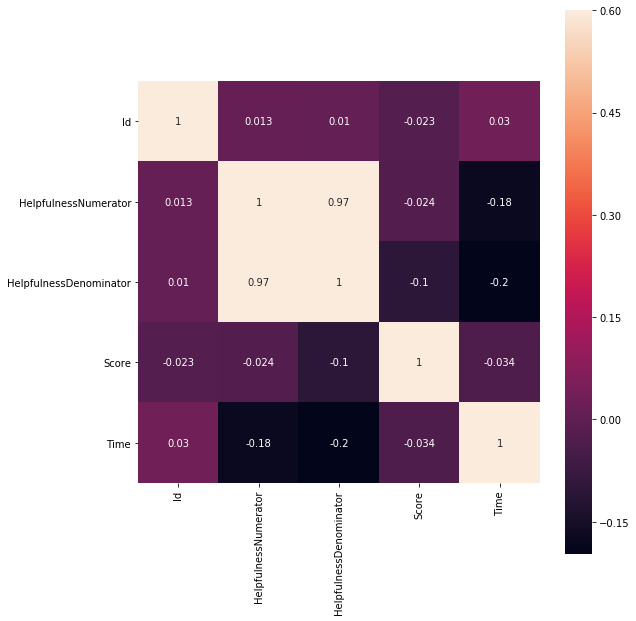

In [7]:
plt.figure(figsize=(9, 10))
# foo = sns.heatmap(pd_data.corr(), vmax=0.6, square=True, annot=True)
foo = sns.heatmap(pd_data.corr(), vmax=0.6, square=True, annot=True)
# pd_data['Time'].head()

## 5. Helpful percent

original:  (10000, 10)
after drop:  (10000, 10)


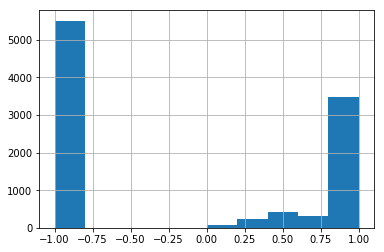

In [8]:
print('original: ', pd_data.shape)
# train_data = train_data.drop(   train_data[(train_data['GrLivArea']>4000) & (train_data['SalePrice']<300000)].index   )
pd_data = pd_data.drop(pd_data[(pd_data['HelpfulnessNumerator'] > pd_data['HelpfulnessDenominator'])].index)
# for index, row in pd_data.iterrows():
#   if row['HelpfulnessNumerator'] > row['HelpfulnessDenominator']:
#     print('oh there really is !!!')
#     break
#   print(row['HelpfulnessNumerator'], row['HelpfulnessDenominator'])

# test = pd_data[(pd_data['HelpfulnessNumerator'] > pd_data['HelpfulnessDenominator'])]
print('after drop: ', pd_data.shape)

# print(pd_data['HelpfulnessNumerator'] / pd_data['HelpfulnessDenominator'])
helpness_dist = pd_data['HelpfulnessNumerator'] / pd_data['HelpfulnessDenominator']
# helpness_dist.hist()
helpness_dist.fillna(-1).replace(0, -1).hist()

# Part 2: Wine Reviews

<img src="https://i.imgur.com/hk8G8oN.jpg" width="900" />

In this section, I wanna play around with the wine review data!

Dataset: [winemag-data_first150k.csv](https://www.kaggle.com/zynicide/wine-reviews)


## This is how the data looks like:

In [9]:
pd.set_option('display.max_columns', 500)
path = './data/winemag-data_first150k.csv'
wine_data = pd.read_csv(path)
print(wine_data.shape)
wine_data.head()

(150930, 11)


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


## Check out the top 10 wines:

In [10]:
top_10_wines = wine_data.groupby("variety")["points"].mean().sort_values(ascending = False).head(10)
top_10_wines.reset_index()

,variety,points
0,Cabernet-Shiraz,96.000000
1,Tokay,93.294118
2,Sirica,93.000000
3,Blauburgunder,93.000000
4,Trousseau Gris,93.000000
5,Muscadel,92.900000
6,Roviello,92.500000
7,Moscato di Noto,92.000000
8,Torontel,92.000000
9,Carignan-Syrah,92.000000


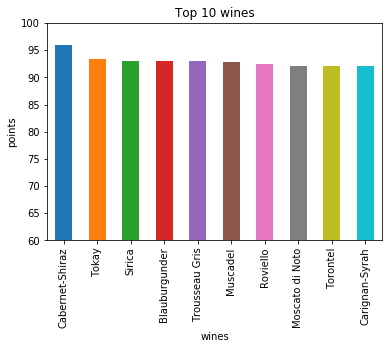

In [11]:
top_10_wines.plot(kind="bar", title="Top 10 wines")
plt.xlabel("wines")
plt.ylabel("points")
plt.ylim(60,100)
plt.show()

## So if the wine got a high score, it must also be expensive, right?

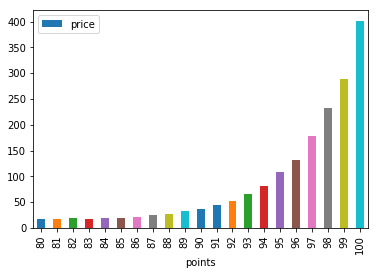

In [12]:
price_vs_score = wine_data.groupby('points')
# sns.barplot(x='points', y='price', data=price_vs_score['price'].mean().reset_index())
price_vs_score['price'].mean().reset_index().plot(kind='bar', x='points', y='price')

Yes, the price is indeed higher!

## Anaylize countrywise:

### Which country produced most reviews ? Let's look at the top 10 countries.

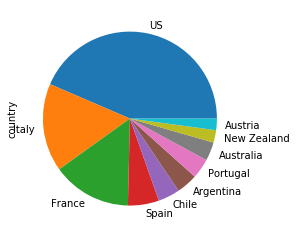

In [13]:
wine_data['country'].value_counts()[0:10].plot(kind='pie')
plt.show()

I'm not surpriced at this result. US is much bigger than the other countries in Europe, though wines in Europe are well known worldwide.

### Let's take a look at the Price distribution
First we have to fill the nan price in order to plot the distribution:

null price percent:  0.0


Text(0.5, 1.0, 'Price distribution')

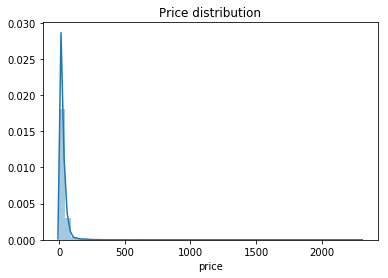

In [14]:
wine_data.price.fillna(0, inplace=True)
print('null price percent: ', wine_data.price.isnull().sum() / wine_data.price.sum())
price_dist = sns.distplot(wine_data.price)
price_dist.set_title('Price distribution')

Apply log transformation, since this often makes prediction more precise.
But let's drop those whose price is 0 first:

Text(0.5, 1.0, 'Price distribution')

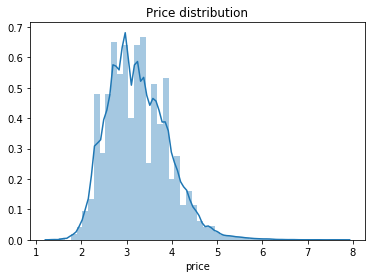

In [15]:
dropped = wine_data.drop(wine_data[wine_data.price == 0].index)
log_price = np.log(dropped.price)
log_price_dist = sns.distplot(log_price)
log_price_dist.set_title('Price distribution')

That do make sense. There won't be too mich expensive wine otherwise no one can afford them.

### Average points, price, and wine production of each country

In [16]:
points_price = wine_data.groupby('country')['points','price'].mean()
num_wine = wine_data.groupby('country')['winery'].count()
data = pd.concat([points_price, num_wine], axis=1)
data.columns= ['Mean Points', 'Mean Price', '#Wine']
data.reset_index()

,country,Mean Points,Mean Price,#Wine
0,Albania,88.000000,20.000000,2
1,Argentina,85.996093,20.632392,5631
2,Australia,87.892475,30.861206,4957
3,Austria,89.276742,25.335296,3057
4,Bosnia and Herzegovina,84.750000,12.750000,4
5,Brazil,83.240000,19.920000,25
6,Bulgaria,85.467532,11.545455,77
7,Canada,88.239796,34.275510,196
8,Chile,86.296768,19.178473,5816
9,China,82.000000,20.333333,3


### Price distribution of country
Show just the first 10000 data here to get a better look:

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text xticklabel objects>)

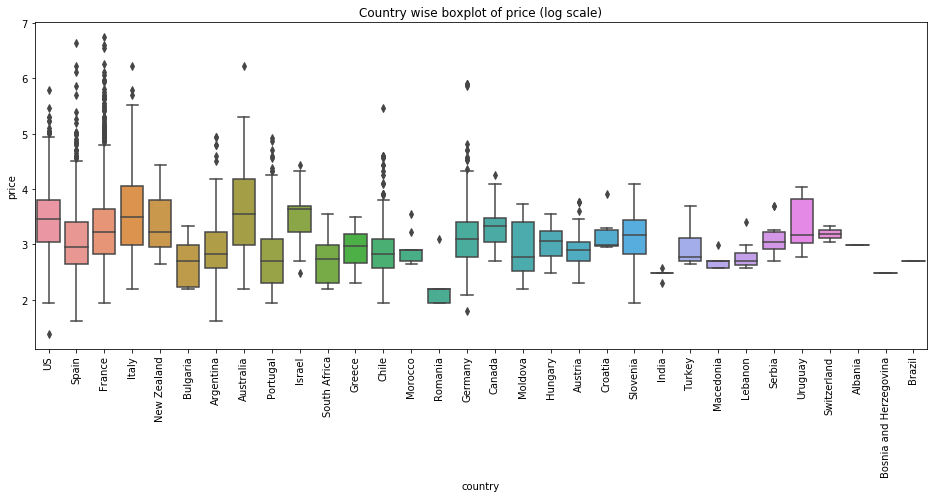

In [17]:
plt.figure(figsize=(16,6))
price_country = sns.boxplot(x = wine_data['country'][0:10000], y = log_price[0:10000])
price_country.set_title('Country wise boxplot of price (log scale)')
plt.xticks(rotation=90)

## The Wine Discription - Natural Language Processing
### Let's take a look at the descriptions of each wine!

In [18]:
import string
from wordcloud import WordCloud
from collections import Counter, defaultdict
import re
import nltk
nltk.download('punkt')
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer, word_tokenize

pd.set_option('display.max_colwidth', 1000)

[nltk_data] Downloading package punkt to /home/jared/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jared/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Remove special character, digit , and tag.

In [19]:
def remove_special(text):
  text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
  text=re.sub("(\\d|\\W)+"," ",text)
  return text.lower()

wine_data['description'] = wine_data['description'].apply(remove_special)
wine_data[['country', 'winery', 'description']].head()

,country,winery,description
0,US,Heitz,this tremendous varietal wine hails from oakville and was aged over three years in oak juicy red cherry fruit and a compelling hint of caramel greet the palate framed by elegant fine tannins and a subtle minty tone in the background balanced and rewarding from start to finish it has years ahead of it to develop further nuance enjoy
1,Spain,Bodega Carmen Rodríguez,ripe aromas of fig blackberry and cassis are softened and sweetened by a slathering of oaky chocolate and vanilla this is full layered intense and cushioned on the palate with rich flavors of chocolaty black fruits and baking spices a toasty everlasting finish is heady but ideally balanced drink through
2,US,Macauley,mac watson honors the memory of a wine once made by his mother in this tremendously delicious balanced and complex botrytised white dark gold in color it layers toasted hazelnut pear compote and orange peel flavors reveling in the succulence of its g l of residual sugar
3,US,Ponzi,this spent months in new french oak and incorporates fruit from ponzi s aurora abetina and madrona vineyards among others aromatic dense and toasty it deftly blends aromas and flavors of toast cigar box blackberry black cherry coffee and graphite tannins are polished to a fine sheen and frame a finish loaded with dark chocolate and espresso drink now through
4,France,Domaine de la Bégude,this is the top wine from la bégude named after the highest point in the vineyard at feet it has structure density and considerable acidity that is still calming down with months in wood the wine has developing an extra richness and concentration produced by the tari family formerly of château giscours in margaux it is a wine made for aging drink from


### Word tokenization

In [20]:
wine_data['tokenized_description'] = wine_data['description'].apply(word_tokenize)
wine_data[['country', 'winery', 'tokenized_description']].head()

,country,winery,tokenized_description
0,US,Heitz,"[this, tremendous, varietal, wine, hails, from, oakville, and, was, aged, over, three, years, in, oak, juicy, red, cherry, fruit, and, a, compelling, hint, of, caramel, greet, the, palate, framed, by, elegant, fine, tannins, and, a, subtle, minty, tone, in, the, background, balanced, and, rewarding, from, start, to, finish, it, has, years, ahead, of, it, to, develop, further, nuance, enjoy]"
1,Spain,Bodega Carmen Rodríguez,"[ripe, aromas, of, fig, blackberry, and, cassis, are, softened, and, sweetened, by, a, slathering, of, oaky, chocolate, and, vanilla, this, is, full, layered, intense, and, cushioned, on, the, palate, with, rich, flavors, of, chocolaty, black, fruits, and, baking, spices, a, toasty, everlasting, finish, is, heady, but, ideally, balanced, drink, through]"
2,US,Macauley,"[mac, watson, honors, the, memory, of, a, wine, once, made, by, his, mother, in, this, tremendously, delicious, balanced, and, complex, botrytised, white, dark, gold, in, color, it, layers, toasted, hazelnut, pear, compote, and, orange, peel, flavors, reveling, in, the, succulence, of, its, g, l, of, residual, sugar]"
3,US,Ponzi,"[this, spent, months, in, new, french, oak, and, incorporates, fruit, from, ponzi, s, aurora, abetina, and, madrona, vineyards, among, others, aromatic, dense, and, toasty, it, deftly, blends, aromas, and, flavors, of, toast, cigar, box, blackberry, black, cherry, coffee, and, graphite, tannins, are, polished, to, a, fine, sheen, and, frame, a, finish, loaded, with, dark, chocolate, and, espresso, drink, now, through]"
4,France,Domaine de la Bégude,"[this, is, the, top, wine, from, la, bégude, named, after, the, highest, point, in, the, vineyard, at, feet, it, has, structure, density, and, considerable, acidity, that, is, still, calming, down, with, months, in, wood, the, wine, has, developing, an, extra, richness, and, concentration, produced, by, the, tari, family, formerly, of, château, giscours, in, margaux, it, is, a, wine, made, for, aging, drink, from]"


### Remove stopwords

In [21]:
stop_words = set(stopwords.words("english"))
def remove_stopwords(sentence):
    ret = []
    for word in sentence:
        if word not in stop_words:
            ret.append(word)
    return ret

wine_data['tokenized_description'] = wine_data['tokenized_description'].apply(remove_stopwords)
wine_data[['country', 'winery', 'tokenized_description']].head()

,country,winery,tokenized_description
0,US,Heitz,"[tremendous, varietal, wine, hails, oakville, aged, three, years, oak, juicy, red, cherry, fruit, compelling, hint, caramel, greet, palate, framed, elegant, fine, tannins, subtle, minty, tone, background, balanced, rewarding, start, finish, years, ahead, develop, nuance, enjoy]"
1,Spain,Bodega Carmen Rodríguez,"[ripe, aromas, fig, blackberry, cassis, softened, sweetened, slathering, oaky, chocolate, vanilla, full, layered, intense, cushioned, palate, rich, flavors, chocolaty, black, fruits, baking, spices, toasty, everlasting, finish, heady, ideally, balanced, drink]"
2,US,Macauley,"[mac, watson, honors, memory, wine, made, mother, tremendously, delicious, balanced, complex, botrytised, white, dark, gold, color, layers, toasted, hazelnut, pear, compote, orange, peel, flavors, reveling, succulence, g, l, residual, sugar]"
3,US,Ponzi,"[spent, months, new, french, oak, incorporates, fruit, ponzi, aurora, abetina, madrona, vineyards, among, others, aromatic, dense, toasty, deftly, blends, aromas, flavors, toast, cigar, box, blackberry, black, cherry, coffee, graphite, tannins, polished, fine, sheen, frame, finish, loaded, dark, chocolate, espresso, drink]"
4,France,Domaine de la Bégude,"[top, wine, la, bégude, named, highest, point, vineyard, feet, structure, density, considerable, acidity, still, calming, months, wood, wine, developing, extra, richness, concentration, produced, tari, family, formerly, château, giscours, margaux, wine, made, aging, drink]"


## Word Visulization
I wanna try out WordCloud here. Let's make it countrywise.

In [22]:
descriptions = defaultdict(list)
wine_data.apply(lambda x: descriptions[x.country].append(" ".join(x.tokenized_description)), axis=1)
descriptions['France'][0:5]

['top wine la bégude named highest point vineyard feet structure density considerable acidity still calming months wood wine developing extra richness concentration produced tari family formerly château giscours margaux wine made aging drink',
 'wine peak condition tannins secondary flavors dominate ripe leather textured wine fruit well dried berries hints black plum skins major wine right point drinking mature flavors fruit right balance',
 'coming seven acre vineyard named dovecote property magnificent wine powered fruit tannins months new wood aging darkly rich great concentration sign pedigree also elegance restraint new wine makes wine long term aging drink',
 'pale color nutty character warm rounded hint red fruits wine soft still fresh aftertaste aged cellars saumur loire river',
 'gingery spice notes accent fresh pear melon fruit medium full bodied wine round palate flabby warm spicy finish drink']

First we oin the list to a string:

In [23]:
for country in descriptions:
  descriptions[country] = " ".join(descriptions[country])
  
descriptions['France'][0:500]

'top wine la bégude named highest point vineyard feet structure density considerable acidity still calming months wood wine developing extra richness concentration produced tari family formerly château giscours margaux wine made aging drink wine peak condition tannins secondary flavors dominate ripe leather textured wine fruit well dried berries hints black plum skins major wine right point drinking mature flavors fruit right balance coming seven acre vineyard named dovecote property magnificent '

Now 'descriptions' is a dict whose value is a long string of description of each country.

### WordCloud !
Let's take France for example, as I love France.

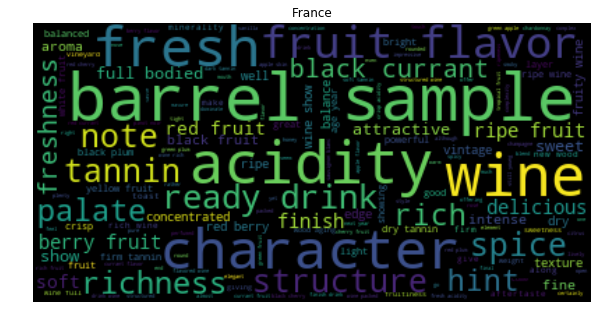

In [24]:
def plot_word_clouds(country, description):
    wordcloud = WordCloud().generate(description[country])
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(country)
    plt.axis("off")
    
plot_word_clouds('France', descriptions)

Right, I forgot something. Some of the common words that occur too often, such as 'wine', 'drink', ... etc,  should be added into stopwords list.
I'll just simply choose some words that I found which should be eliminated.

In [25]:
wine_stopwords = ['drink', 'wine', 'wines', 'show', 'shows', 'flavor', 'flavors', 'palate', 'finish']
stop_words = stop_words.union(wine_stopwords)

for country in descriptions:
  descriptions[country] = [word for word in descriptions[country].split() if not word in stop_words]
  descriptions[country] = " ".join(descriptions[country])
  
descriptions['France'][0:500]

'top la bégude named highest point vineyard feet structure density considerable acidity still calming months wood developing extra richness concentration produced tari family formerly château giscours margaux made aging peak condition tannins secondary dominate ripe leather textured fruit well dried berries hints black plum skins major right point drinking mature fruit right balance coming seven acre vineyard named dovecote property magnificent powered fruit tannins months new wood aging darkly r'

Now let's give it a try again:

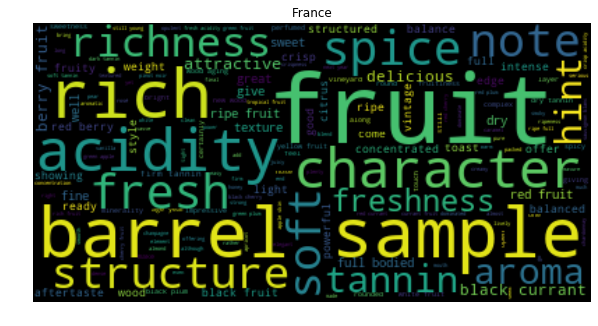

In [26]:
plot_word_clouds('France', descriptions)

That's a little better, in my opinion at least.
### Let's see more of them

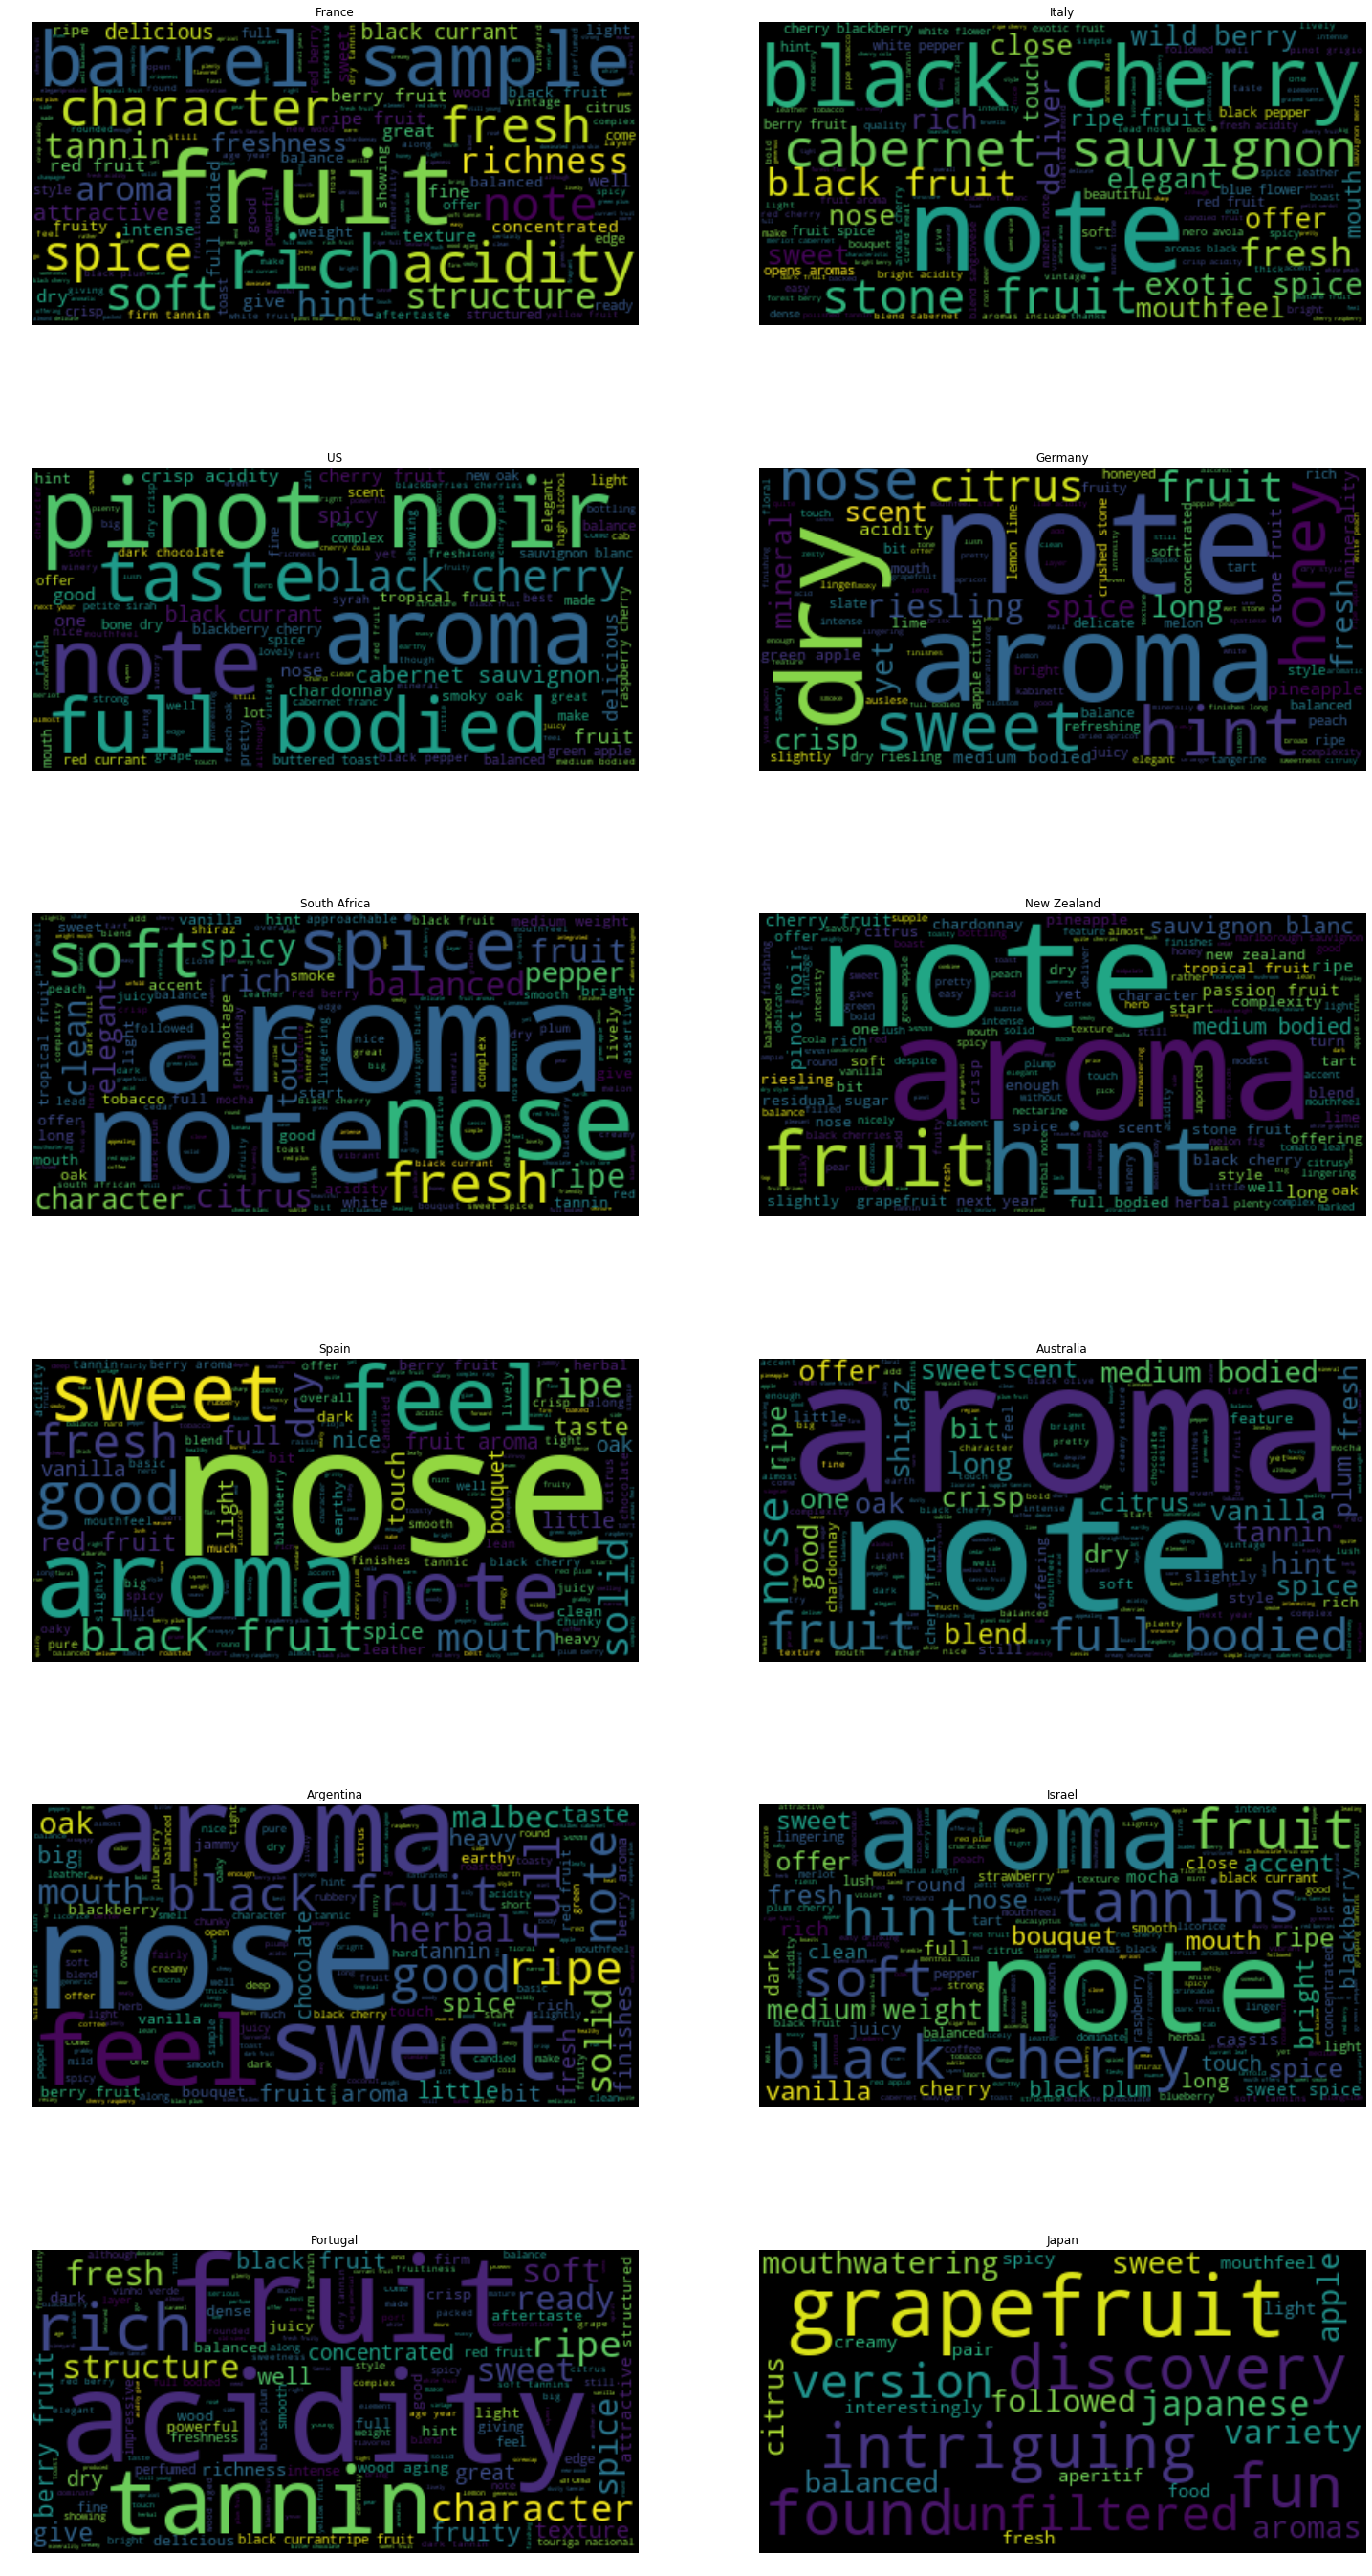

In [27]:
# Redefine the plot function
def subplot_word_clouds(country, description, axis):
    wordcloud = WordCloud().generate(description[country])
#     axis.figure(figsize=(10, 10))
    axis.imshow(wordcloud, interpolation='bilinear')
    axis.set_title(country)
    axis.axis("off")

fig, axarr = plt.subplots(6, 2, figsize = (25, 50))
subplot_word_clouds('France', descriptions, axarr[0][0])
subplot_word_clouds('Italy', descriptions, axarr[0][1])
subplot_word_clouds('US', descriptions, axarr[1][0])
subplot_word_clouds('Germany', descriptions, axarr[1][1])
subplot_word_clouds('South Africa', descriptions, axarr[2][0])
subplot_word_clouds('New Zealand', descriptions, axarr[2][1])
subplot_word_clouds('Spain', descriptions, axarr[3][0])
subplot_word_clouds('Australia', descriptions, axarr[3][1])
subplot_word_clouds('Argentina', descriptions, axarr[4][0])
subplot_word_clouds('Israel', descriptions, axarr[4][1])
subplot_word_clouds('Portugal', descriptions, axarr[5][0])
subplot_word_clouds('Japan', descriptions, axarr[5][1])

Aroma, sweet, good, pinot noir..., Ooooh I can almost "smell" these Intoxicating wines from the words!
## I hope you enjoy this!